In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Sunspot Dataset

In [112]:
df = pd.read_csv("Sunspots.csv")
df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8


Text(0, 0.5, 'Value')

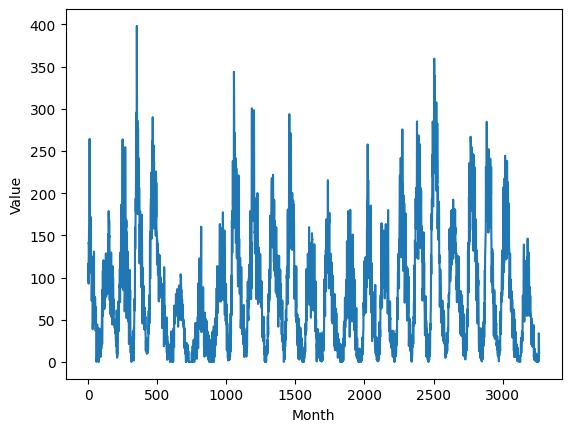

In [113]:
plt.plot(df["Monthly Mean Total Sunspot Number"])
plt.xlabel('Month')
plt.ylabel('Value')

In [114]:
data = pd.read_csv('Sunspots.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Class'] = data['Date'].dt.month.apply(lambda x: 0 if x <= 6 else 1)

In [115]:
time_series_data = []
class_labels = []

In [116]:
for year, year_data in data.groupby(data['Date'].dt.year):

    class0_year_data = year_data[year_data['Class'] == 0].reset_index(drop=True)
    class0_year_data = class0_year_data.head(6)  # keep only the first 6 months
    class0_time_series = class0_year_data['Monthly Mean Total Sunspot Number'].tolist()
    
    class1_year_data = year_data[year_data['Class'] == 1].reset_index(drop=True)
    class1_year_data = class1_year_data.head(6)  # keep only the first 6 months
    class1_time_series = class1_year_data['Monthly Mean Total Sunspot Number'].tolist()
    
    time_series_data.append(class0_time_series)
    class_labels.append(0)
    time_series_data.append(class1_time_series)
    class_labels.append(1)

Discard the last two due to incomplete data

In [117]:
for i in range(len(time_series_data)):
    if len(time_series_data[i]) != 6:
        print(i)
        

544
545


In [118]:
time_series_data.pop()
time_series_data.pop()
class_labels.pop()
class_labels.pop()

0

In [120]:
time_series_array = np.array(time_series_data)
class_labels_array = np.array(class_labels)

In [134]:
time_series_array.shape

(544, 6)

So there are a total of 544 samples, each of length 6 - 244 class 0 and 244 class 1.

Text(0.5, 1.0, 'Class 0')

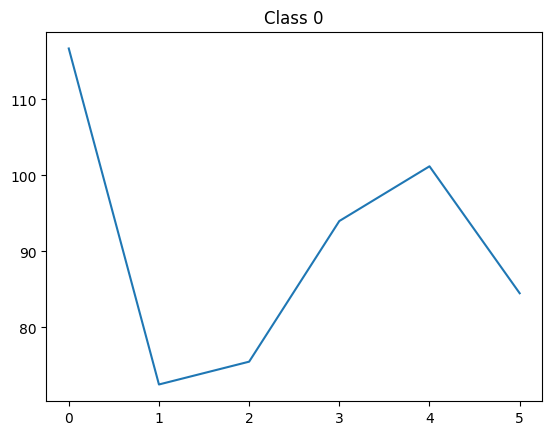

In [142]:
idx = 4
plt.plot(time_series_array[idx, :])
plt.title(f"Class {class_labels_array[idx]}")

In [154]:
X_train, X_test, y_train, y_test = train_test_split(time_series_array, class_labels_array, shuffle=True, stratify=class_labels_array, random_state=42)

In [159]:
print(X_train.shape)
print(X_test.shape)

(408, 6)
(136, 6)


Left join labels with time series

In [170]:
ss_train = np.hstack([np.array(y_train).reshape(-1, 1), X_train])
ss_test = np.hstack([np.array(y_test).reshape(-1, 1), X_test])

In [176]:
print(ss_train.shape)
print(ss_test.shape)

(408, 7)
(136, 7)


In [177]:
np.savetxt("sunspot_train.txt", ss_train)

In [178]:
np.savetxt("sunspot_test.txt", ss_test)